## A simple example with MNIST
For our first computer vision example, we use MNIST-data of handwritten digits and build a machine learning model that predicts the correct digit.

We use Keras-library for this example that is now included in Tensorflow. First, we import Tensorflow and define an alias "tf" for it.

In [1]:
import tensorflow as tf

With the following commands, you can check what kind of computing units are available. Of course, you are looking for GPU-units to speed up computations.

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

So, I have Quadro P5200 available for calculations. It will speed up calculations a lot when compared to CPU. If you do not have an Nvidia GPU available for calculations, some of the steps below will be very slow to calculate.

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5431501192980353314
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8600286210571935400
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15377981760
locality {
  bus_id: 1
  links {
  }
}
incarnation: 288691775772272510
physical_device_desc: "device: 0, name: Quadro P5200, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6631627173311666875
physical_device_desc: "device: XLA_GPU device"
]


### The MNIST dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used as the first test for computer vision models. These are 28x28 pixel images that are anti-aliased from the original NIST black and white images, and thus, grayscale images with 256 levels. The database contains 60,000 training images and 10,000 testing images.

![MNIST](./images/mnist.png)

**Keras.dataset** has the MNIST dataset, so we avoid the hassle of downloading and preprocessing the dataset by ourselves.

In [4]:
mnist = tf.keras.datasets.mnist

With **load_data()**, we can load the train and test datasets as **Numpy arrays**.

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
type(x_train)

numpy.ndarray

We have 60000 images in the training set and 10000 images in the test set.

In [7]:
len(x_train), len(x_test)

(60000, 10000)

Let's check what kind of data we have. Matplotlib has a function to plot images. First, we load the library. With **plt.imshow()**, we can plot the image. We need to set **cmap=gray** to get the correct grayscale image.

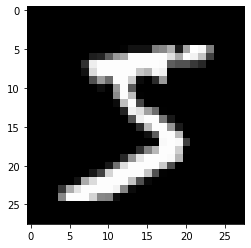

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap='gray')

In [9]:
y_train[0]

5

The originals are greyscale images with each pixel having a value from 0 to 255. We normalize them to values between 0 and 1 (neural networks like small values).

In [10]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### Densely connected network
First, we fit a traditional densely connected feed-forward neural network to the data.

![image.png](./images/feed_forward.png)!

Our data is a 3D-tensor of the form 60000 images x 28 pixels x 28 pixels. Sometimes we need to make the transform (60000,28,28) --> (60000,28,28,1) and sometimes not. If you get an error in the model.fit -step, run the code below.

In [11]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

Currently, our labels are integers from 0 to 9. We need to transorm them to binary classes. For example 1-->(0,1,0,0,0,0,0,0,0,0) and 9-->(0,0,0,0,0,0,0,0,0,1). This can be done with the **to_categorical()** -function in Keras.utils.

In [12]:
train_labels = tf.keras.utils.to_categorical(y_train)

In [13]:
test_labels = tf.keras.utils.to_categorical(y_test)

One way to define a neural network with Keras is a single **Sequential**-command that has the layers in a list as a parameter. The densely connected layer has **ReLU** as an activation function. Because we want to categorise ten digits, **softmax** is the correct activation function for the last layer. Notice how the last layer has ten outputs, one for each digit. The **Flatten()**-layer transforms the 28 x 28 -image to a vector of size 784.

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])

You can check your model with the **summary()** -function. The model has 203 530 parameters.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


With **compile()**, we build our neural network to be ready for use. For classification problems, **categorical_crossentropy** is the correct loss function. We measure our performance with accuracy. It is just the percentage of correct classifications.

In [16]:
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'])

Next, we feed the training data to our model and train it using back-propagation. Everything is automatic, so, we do not need to worry about the details. The training data accuracy rises to 0.986 = 98.6%. However, true performance needs to be evaluated using test data. We can save to **history** information about the training process. The model is trained with batches of 64 images. So, to go through all the images, we need 938 rounds (the last batch has 32 images). One epoch is one round of going through all the data.

In [17]:
history = model.fit(x_train,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 0.2530 - accuracy: 0.9276
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1088 - accuracy: 0.9674
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0753 - accuracy: 0.9779
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0570 - accuracy: 0.9830
Epoch 5/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0462 - accuracy: 0.9860


The following code plots the progress of training. Within the code is info for different commands.

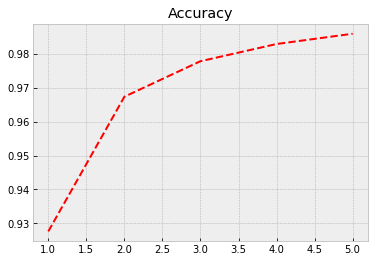

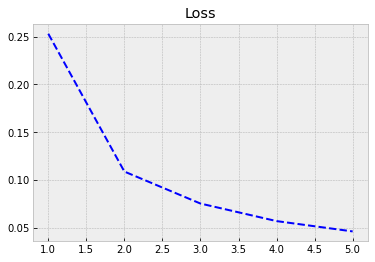

In [18]:
plt.style.use('bmh') # We select as a plot-style 'bmh' that is in my opinion usually the prettiest.
acc = history.history['accuracy'] # The evolution of accuracy to a list.
loss = history.history['loss'] # The evolution of loss to a list.
epochs = range(1, len(acc) + 1) # Correct x-axis values (epochs)
plt.plot(epochs, acc, 'r--') # Plot epochs vs. accuracy
plt.title('Accuracy') # Add title
plt.figure() # Show the first figure. Without this command, accuracy and loss would be drawn to the same plot.
plt.plot(epochs, loss, 'b--') # Plot epochs vs. loss
plt.title('Loss') # Add title
plt.show() # Show everyhting

**Evaluate()** can be used to evaluate the model with the test data. Acccuracy with the test data is 0.974

In [20]:
test_loss,test_acc = model.evaluate(x_test,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 0.9743


In [21]:
test_acc

0.9743000268936157

### Convolutional neural network

Identifying the digits correctly is a computer vision problem. So, we should expect that convolutional neural networks would perform better. Thus, we build a simple CNN to identify the digits.

![image.png](./images/cnn_example.gif)

With Keras, we can also build the network using sequential **add()**-commands. We first define the **Sequential()**-type and then add the layers with the **add()* -function.

In [22]:
model_cnn = tf.keras.models.Sequential()

A convolutional layer with 32 feature maps and a 3x3 -filter: The activation is again **ReLU**. For the first layer, we need to define the format of the input data, in this case, 28 x 28 -pixel images.

In [23]:
model_cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))

A max-pooling layer to decrease the size of the feature maps. The maximum values are selected from a 2 x 2 window.

In [24]:
model_cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

Again, a convolutional layer. Notice how the number of feature maps increases. This is typical for CNN architectures.

In [25]:
model_cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))

A second max-pooling layer.

In [26]:
model_cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

A third convolutional layer.

In [27]:
model_cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))

**Flatten()** -layer transforms the 2D feature maps to a 1D vector so that we can feed it to an ordinary densely-connected layer.

In [28]:
model_cnn.add(tf.keras.layers.Flatten())

One densely-connected layer before the output-layer.

In [29]:
model_cnn.add(tf.keras.layers.Dense(64,activation = 'relu'))

The output-layer has ten neurons that give probabilities for each digit. **Softmax** is the correct activation function for categorical predictions.

In [30]:
model_cnn.add(tf.keras.layers.Dense(10,activation = 'softmax'))

The **summary()** -function shows that our model has 93 322 parameters. Thus, much less than the previous densely-connected traditional neural network.

In [31]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

Again, we compile our model...

In [32]:
model_cnn.compile(loss='categorical_crossentropy', metrics = ['accuracy'])

...and train it.

Although our model has much fewer parameters, the performance with the training data is much better. Now, the accuracy is 0.994. Let's see how it performs with the test data...

In [33]:
history = model_cnn.fit(x_train,train_labels,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1723 - accuracy: 0.9465
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0464 - accuracy: 0.9857
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0317 - accuracy: 0.9907
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0247 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0192 - accuracy: 0.9944


Again we plot the progress from **history**.

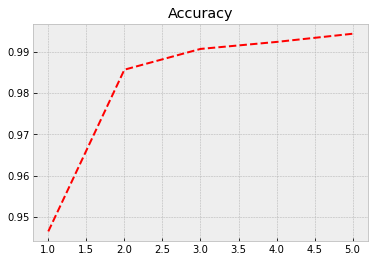

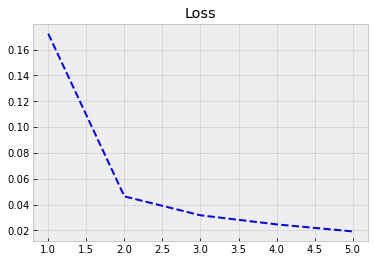

In [34]:
plt.style.use('bmh') # We select as a plot-style 'bmh' that is in my opinion usually the best.
acc = history.history['accuracy'] # The evolution of accuracy to a list.
loss = history.history['loss'] # The evolution of loss to a list.
epochs = range(1, len(acc) + 1) # Correct x-axis values (epochs)
plt.plot(epochs, acc, 'r--') # Plot epochs vs. accuracy
plt.title('Accuracy') # Add title
plt.figure() # Show the first figure. Without this command, accuracy and loss would be drawn to the same plot.
plt.plot(epochs, loss, 'b--') # Plot epochs vs. loss
plt.title('Loss') # Add title
plt.show() # Show everyhting

With **evaluate()**, we can check the performance with the test data. We achieve much better accuracy of 0.989 with much fewer parameters.

In [35]:
test_loss,test_acc = model_cnn.evaluate(x_test,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0386 - accuracy: 0.9890


In [36]:
test_acc

0.9890000224113464